In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
churn = pd.read_csv('churn.csv')

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), int64(12)

In [11]:
churn.describe()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.483033,0.299588,0.903166,0.343746,0.439585,0.384353,0.387903,0.550192,0.209144,0.219225,0.216101,0.335794,64.761692,2275.929881
std,0.499748,0.458110,0.295752,0.474991,0.496372,0.486477,0.487307,0.497510,0.406726,0.413751,0.411613,0.472301,30.090047,2266.920469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,392.575000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.350000,1389.850000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,89.850000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [12]:
# 类别型特征转换成数值型的特征  one-hot 编码
churn = pd.get_dummies(churn)
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,1,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,0,1,0,1
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,0,1,1,0


In [13]:
churn1 = churn.drop(['Churn_No','gender_Male'],axis = 1)

In [14]:
churn1.columns = churn1.columns.str.lower()

In [15]:
churn1 = churn1.rename(columns = {'churn_yes':'flag'})

In [16]:
#  分类问题, 看标签的分布, 是不是不均衡的数据集
churn1.flag.value_counts(1)

0    0.73463
1    0.26537
Name: flag, dtype: float64

In [17]:
churn1.groupby('flag').mean()  # 特征在不同的标签上 表现有差异, 这样的特征就是好的特征

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,gender_female
flag,,,,,,,,,,,,,,,
0,0.528218,0.344801,0.901044,0.379204,0.347700,0.365868,0.369927,0.429068,0.252609,0.248550,0.249324,0.250097,61.265124,2545.918081,0.492656
1,0.357945,0.174425,0.909042,0.245586,0.693954,0.435527,0.437667,0.885500,0.088818,0.138042,0.124131,0.573034,74.441332,1528.514714,0.502408


<AxesSubplot:xlabel='count', ylabel='contract_month'>

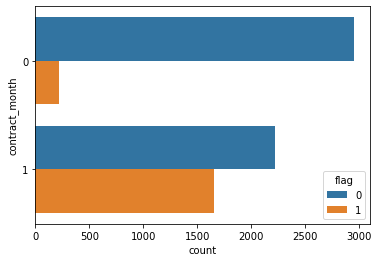

In [18]:
sns.countplot(y='contract_month',hue = 'flag',data = churn1)

<AxesSubplot:xlabel='count', ylabel='internet_other'>

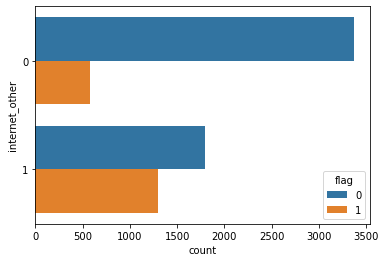

In [19]:
sns.countplot(y='internet_other',hue = 'flag',data = churn1)

<AxesSubplot:xlabel='count', ylabel='landline'>

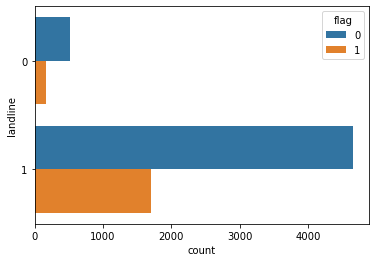

In [20]:
sns.countplot(y='landline',hue = 'flag',data = churn1)

<AxesSubplot:xlabel='landline', ylabel='count'>

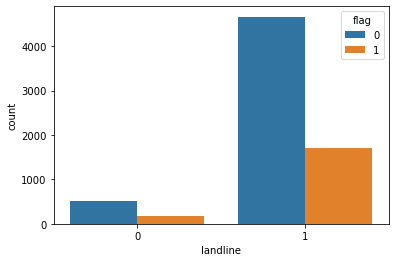

In [21]:
sns.countplot(x='landline',hue = 'flag',data = churn1)

In [23]:
# 挑选特征进行建模
y = churn1['flag']
x = churn1[['contract_month','internet_other','paymentelectronic']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 使用逻辑回归建模
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
# 模型评估
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_train,y_train)

In [21]:
accuracy_score(y_pred_test,y_test)

0.7624230951254141

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_test)

0.6472872378089588

In [25]:
roc_auc_score(y_train,y_pred_train)

0.6669635362478181

In [35]:
lr = LogisticRegression(class_weight='balanced') # 使用逻辑回归建模
lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
roc_auc_score(y_test,y_pred_test)

0.7273275986121549

In [27]:
roc_auc_score(y_train,y_pred_train)

0.7449819413154645

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
kfold = StratifiedKFold(n_splits=5,shuffle=True)
lr = LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100],'class_weight':['balanced']}
search = GridSearchCV(lr,param_grid,cv = kfold)
search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [30]:
search.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'solver': 'newton-cg'}

In [31]:
search.best_score_

0.7503042596348886

In [32]:
search.cv_results_

{'mean_fit_time': array([0.01227007, 0.00779786, 0.00437031, 0.01339326, 0.007307  ,
        0.00450845, 0.01882086, 0.00922184, 0.0051652 , 0.01456828,
        0.00877633, 0.00511103, 0.014712  , 0.00922079, 0.00480947]),
 'std_fit_time': array([2.25782901e-03, 2.39480419e-03, 5.26191470e-04, 1.58815629e-03,
        3.04989437e-04, 2.27911971e-04, 2.60860764e-03, 6.32310622e-04,
        2.59722944e-04, 2.73084149e-03, 1.44975226e-03, 2.72922962e-04,
        9.23374880e-04, 1.14558747e-03, 7.91108054e-05]),
 'mean_score_time': array([0.00144167, 0.00152998, 0.00138912, 0.00150914, 0.00132656,
        0.00147753, 0.00186119, 0.0016099 , 0.00154705, 0.00147176,
        0.00149226, 0.00149283, 0.00170784, 0.00149798, 0.00143638]),
 'std_score_time': array([1.53799862e-04, 2.02978629e-04, 1.29773981e-04, 1.73165920e-04,
        1.28458727e-04, 1.06493805e-04, 4.92336008e-04, 1.22053883e-04,
        1.17882922e-04, 1.14287233e-04, 1.97363182e-04, 7.50309897e-05,
        6.23684436e-04, 1.05

In [33]:
search.best_estimator_.coef_

array([[1.3514006 , 0.78768896, 0.58701812]])

In [36]:
lr.coef_

array([[2.02904262, 1.06523664, 0.65214068]])